# Understanding everything in the training loop -- SOLUTION

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import randint
import utils

### Download the data and print the sizes

In [2]:
train_data=torch.load('../../data/fashion-mnist/data/train_data.pt')

print(train_data.size())

torch.Size([60000, 28, 28])


In [3]:
train_label=torch.load('../../data/fashion-mnist/data/train_label.pt')

print(train_label.size())

torch.Size([60000])


In [4]:
test_data=torch.load('../../data/fashion-mnist/data/test_data.pt')

print(test_data.size())

torch.Size([10000, 28, 28])


### Make a ONE layer net class. The network output are the scores! No softmax needed! You have only one line to write in the forward function

In [5]:
class one_layer_net(nn.Module):

    def __init__(self, input_size, output_size):
        super(one_layer_net , self).__init__()
        self.linear_layer = nn.Linear( input_size, output_size , bias=False)
        
    def forward(self, x):
        scores = self.linear_layer(x)
        return scores

### Build the net

In [6]:
net=one_layer_net(784,10)
print(net)

one_layer_net(
  (linear_layer): Linear(in_features=784, out_features=10, bias=False)
)


### Choose the criterion, optimizer. Set the batchize and learning rate to be:
### batchize = 50
### learning rate = 0.01

In [7]:
criterion = nn.CrossEntropyLoss()

optimizer=torch.optim.SGD( net.parameters() , lr=0.01 )

bs=50

### Complete the training loop -- don't copy ans paste!

In [8]:
for iter in range(1,5000):
    
    # Set dL/dU, dL/dV, dL/dW to be filled with zeros
    optimizer.zero_grad()
     
    # create a minibatch
    indices=torch.LongTensor(bs).random_(0,60000)
    minibatch_data =  train_data[indices]
    minibatch_label= train_label[indices]
    
    #reshape the minibatch
    inputs = minibatch_data.view(bs,784)
    
    # tell Pytorch to start tracking all operations that will be done on "inputs"
    inputs.requires_grad_()

    # forward the minibatch through the net  
    scores=net( inputs ) 
    
    # Compute the average of the losses of the data points in the minibatch
    loss = criterion( scores , minibatch_label) 
    
    # backward pass to compute dL/dU, dL/dV and dL/dW    
    loss.backward()
    
    # do one step of stochastic gradient descent: U=U-lr(dL/dU), V=V-lr(dL/dU), ...
    optimizer.step()

### Choose image at random from the test set and see how good/bad are the predictions

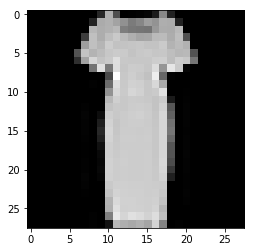

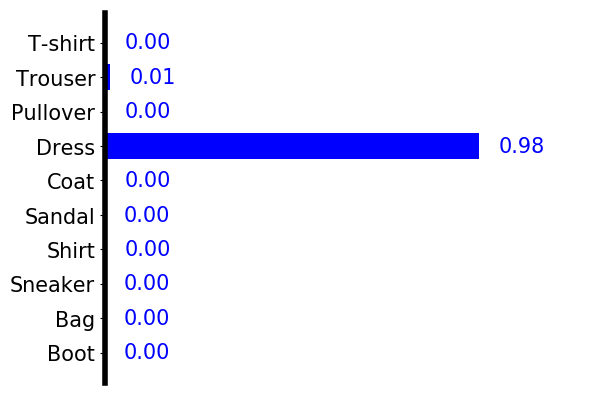

In [9]:
# choose a picture at random
idx=randint(0, 10000-1)
im=test_data[idx]

# diplay the picture
utils.show(im)

# feed it to the net and display the confidence scores
scores =  net( im.view(1,784)) 
probs= F.softmax(scores, dim=1)
utils.show_prob_fashion_mnist(probs)